# Omega Format 

## Create Omega Files

### From ASAM OpenDRIVE and OSI
Create Recording form OSI GroundTruth stream and ASAM OpenDrive map and store it to an mcap file.


In [1]:
import omega_format
r = omega_format.Recording.from_file('example_files/pedestrian.osi', xodr_path='example_files/fabriksgatan.xodr')
r.to_mcap('example.mcap')

Header of openDRIVE file provides no geo reference. Please update! Converter takes default values for now.


roads:   0%|          | 0/16 [00:00<?, ?it/s]

### From Dataframe and ASAM OpenDRIVE

You can also directly create a recording from object data in table form (we use pandas). Create a table `df` like the following:

|   total_nanos |   idx |       x |        y |     z |    vel_x |   vel_y |   vel_z |      acc_x |      acc_y |   acc_z |   length |   width |   height |   roll |   pitch |     yaw |   type |   role |   subtype |
|--------------:|------:|--------:|---------:|------:|---------:|--------:|--------:|-----------:|-----------:|--------:|---------:|--------:|---------:|-------:|--------:|--------:|-------:|-------:|----------:|
|       0       |     0 | 42.6987 | -69.8783 | 0.75  | -2.04032 | 9.78964 |       0 |  0         |  0         |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.77627 |      2 |      0 |         4 |
|       0       |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |
|       3.3e+07 |     0 | 42.6306 | -69.5554 | 0.75  | -2.04288 | 9.78896 |       0 | -0.0774077 | -0.020523  |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.7768  |      2 |      0 |         4 |
|       3.3e+07 |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |
|       6.6e+07 |     0 | 42.5623 | -69.2325 | 0.75  | -2.04801 | 9.7879  |       0 | -0.155563  | -0.0323452 |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.77732 |      2 |      0 |         4 |
|       6.6e+07 |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |

`type`, `subtyp` and `role` have to be integers and correspond to the enumerations `betterosi.MovingObjectType`, `betterosi.MovingObjectVehicleClassificationType` and `betterosi.MovingObjectVehicleClassificationRole`. The `role` and `subtype` have to be `-1` when the `type` is not of `TYPE_VEHICLE`.

In [2]:
import betterosi
print(f"MovingObjectType: {({o.name: o.value for o in betterosi.MovingObjectType})}")
print(f"MovingObjectVehicleClassificationType: {({o.name: o.value for o in betterosi.MovingObjectVehicleClassificationType})}")
print(f"MovingObjectVehicleClassificationRole: {({o.name: o.value for o in betterosi.MovingObjectVehicleClassificationRole})}")

MovingObjectType: {'TYPE_UNKNOWN': 0, 'TYPE_OTHER': 1, 'TYPE_VEHICLE': 2, 'TYPE_PEDESTRIAN': 3, 'TYPE_ANIMAL': 4}
MovingObjectVehicleClassificationType: {'TYPE_UNKNOWN': 0, 'TYPE_OTHER': 1, 'TYPE_SMALL_CAR': 2, 'TYPE_COMPACT_CAR': 3, 'TYPE_CAR': 4, 'TYPE_LUXURY_CAR': 5, 'TYPE_DELIVERY_VAN': 6, 'TYPE_HEAVY_TRUCK': 7, 'TYPE_SEMITRACTOR': 16, 'TYPE_SEMITRAILER': 8, 'TYPE_TRAILER': 9, 'TYPE_MOTORBIKE': 10, 'TYPE_BICYCLE': 11, 'TYPE_BUS': 12, 'TYPE_TRAM': 13, 'TYPE_TRAIN': 14, 'TYPE_WHEELCHAIR': 15, 'TYPE_STANDUP_SCOOTER': 17}
MovingObjectVehicleClassificationRole: {'ROLE_UNKNOWN': 0, 'ROLE_OTHER': 1, 'ROLE_CIVIL': 2, 'ROLE_AMBULANCE': 3, 'ROLE_FIRE': 4, 'ROLE_POLICE': 5, 'ROLE_PUBLIC_TRANSPORT': 6, 'ROLE_ROAD_ASSISTANCE': 7, 'ROLE_GARBAGE_COLLECTION': 8, 'ROLE_ROAD_CONSTRUCTION': 9, 'ROLE_MILITARY': 10}


In [7]:
import pandas as pd
import omega_format
df = pd.read_csv('example_files/example.csv')
r = omega_format.Recording(df=df, map=omega_format.asam_odr.MapOdr.from_file('example_files/fabriksgatan.xodr'))

Header of openDRIVE file provides no geo reference. Please update! Converter takes default values for now.


roads:   0%|          | 0/16 [00:00<?, ?it/s]

## Read and Plot Omega File

Header of openDRIVE file provides no geo reference. Please update! Converter takes default values for now.


roads:   0%|          | 0/16 [00:00<?, ?it/s]

<Axes: >

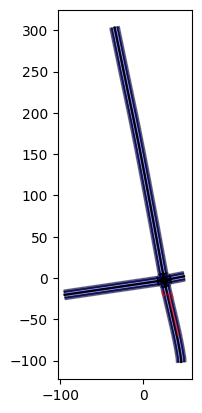

In [8]:
r = omega_format.Recording.from_file('example.mcap')
r.plot()

<Axes: >

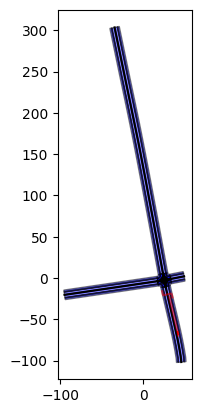

In [9]:
r.plot_frame(10)

In [10]:
r.map

In [11]:
r.moving_objects

{0: <omega_format.recording.MovingObject at 0x2522ef040e0>,
 1: <omega_format.recording.MovingObject at 0x2522ef042c0>}